# PROCCESING EPR DATA

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
import os
import pandas as pd
from scipy import integrate
from sympy import diff
import glob
import scipy
import seaborn as sns
current_palette = sns.color_palette("muted")
import matplotlib as mpl
from pylab import cm
import matplotlib.font_manager


plt.style.use('default')
plt.rcParams.update({'figure.figsize':(5.425197, 4.0688),
                     'text.usetex': False,
                     'font.family': 'sans',
                     'font.sans-serif': 'Linux Biolinum',
                     'font.size': 14,
                     'mathtext.fontset': 'custom',
                     'mathtext.rm': 'Linux Biolinum',
                     'mathtext.it': 'Linux Biolinum:italic',
                     'mathtext.bf': 'Linux Biolinum:bold',
                     'lines.linewidth': 2.5,
                     'xtick.labelsize': 18,
                     'ytick.labelsize': 18,
                     'axes.titlesize': 18,
                     'axes.labelsize': 18,
                     'legend.frameon': True,
                     'legend.fancybox': True,
                     'legend.fontsize': 9,
                     'legend.framealpha': 0,
                     'legend.handletextpad': 0.5,
                     'legend.labelspacing': 0.2,
                     'legend.borderpad': 0.5,
                     'legend.loc': 'best',
                     'savefig.dpi': 600,
                     'pdf.compression': 9})

In [46]:
save_fig = '/Users/smoluakov/Documents/DIPLOMA/DATA_PROCCESING/CD154/IMAGES/EPR'


## GENERATION

In [4]:
directory = '/Users/smoluakov/Documents/DIPLOMA/EPR_DATA/10.03_CD154/EXEL/generation/excel'
list_of_files = sorted(os.listdir(directory))

data = pd.read_excel(directory+'/'+'cd154_full.xlsx')

In [5]:
data

,X (500 points),Y (Average),Y (Average).1,Y (Average).2,Y (Average).3,Y (Average).4,Y (Average).5,Y (Average).6,Y (Average).7,Y (Average).8,Y (Average).9,Y (Average).10,Y (Average).11
0,332.152771,-42.114353,-55.345444,-36.719135,-151.748276,-88.500343,41.038658,70.153648,-81.579056,-19.475258,-85.379700,-50.599716,106.969009
1,332.165680,26.913132,203.216751,-5.485870,224.241547,89.440933,110.012253,-71.893555,222.442245,76.031982,191.617737,3.262974,-50.574707
2,332.178619,-116.291130,-114.310532,4.666531,-9.196213,19.563864,55.025822,84.442963,-242.746613,-57.530342,-6.061530,-214.714096,36.583160
3,332.191528,206.588196,71.312836,49.326519,-194.916580,62.192352,-168.596802,-110.411896,98.495430,-165.781403,-64.162239,154.235397,2.701599
4,332.204468,-60.858166,82.342903,-53.299889,156.741409,-19.720331,228.183304,-63.123405,-48.610573,249.654205,230.210114,-56.014042,64.034401
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,338.551422,-135.822784,-65.742104,-327.533997,-58.331509,-130.058990,-209.692703,-50.213558,-238.532074,-122.558586,-37.758499,55.625160,-240.243469
496,338.564362,-50.593906,-263.588226,-126.595413,-76.300056,-190.323654,47.477135,-119.703857,101.497421,-75.743271,35.496067,-181.501617,53.498566
497,338.577301,-109.561310,48.311314,-222.301773,-44.232246,139.172684,-135.965561,-158.512939,-151.487900,-49.858807,-131.527847,-205.213516,-159.875870
498,338.590210,-174.594559,-218.791718,-17.217026,-124.911163,-158.409241,-119.654961,-14.798979,-68.854584,-65.239479,45.273293,-36.714886,8.180918


findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.


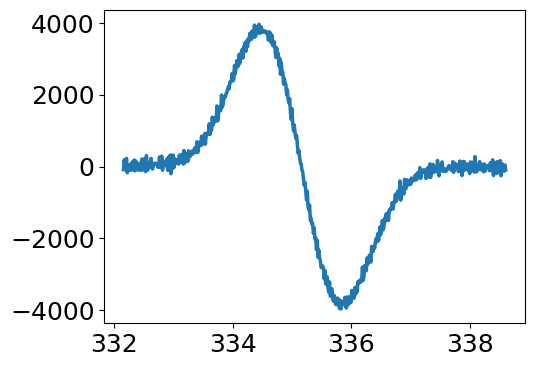

In [6]:
plt.plot(data['X (500 points)'], data['Y (Average).9'])

<AxesSubplot:>

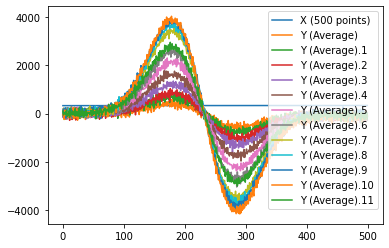

In [6]:
data.plot()

In [7]:
x = data['X (500 points)']
y_full = data.drop(['X (500 points)'], axis=1)
y_names = list(y_full.columns)
time = [14,19,22,25,28,31,34,40,43,46,52,55,75]

findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.


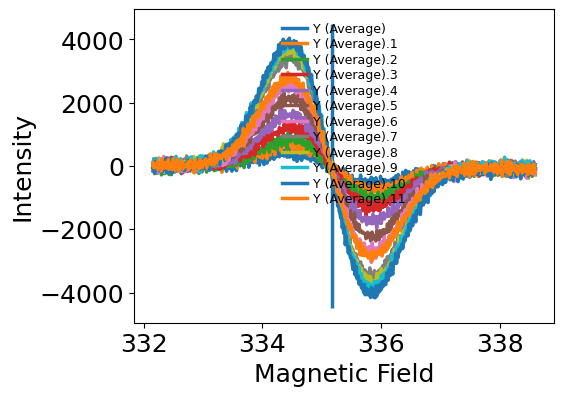

In [33]:
import seaborn as sns
plt.figure()
plt.xlabel('Magnetic Field')
plt.ylabel('Intensity')
#plt.vlines(335.38, -7500,7500)
plt.vlines(335.17, -4500,4500)
for name in y_names:
    plt.plot(x, y_full[name], label=name) # посчитал в экселе сколько между 335.17 и 335.38 точек
    plt.legend()

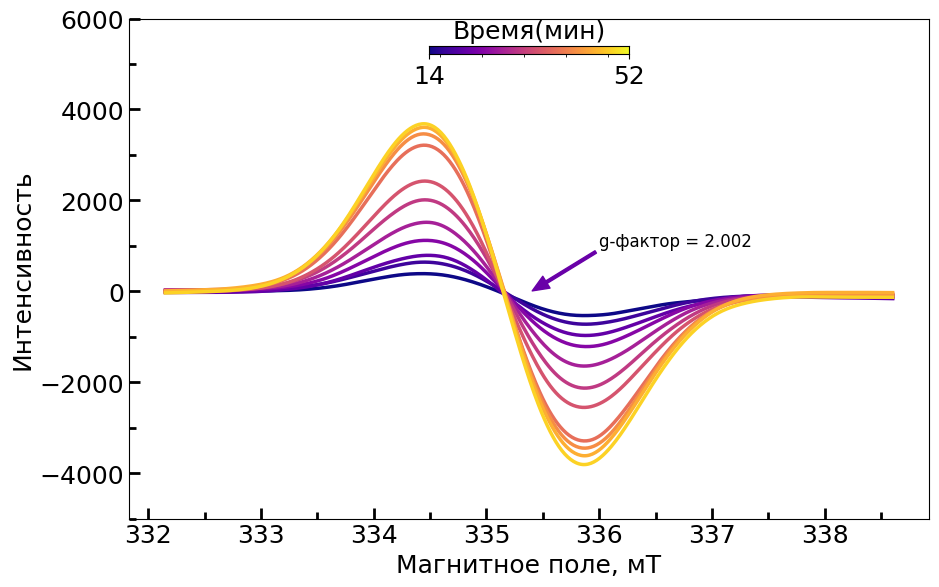

In [20]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns

from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

fig = plt.figure(figsize=(8,5))
ax = plt.gca()
ax = fig.add_axes([0,0,1,1])

#plt.figure(figsize=(8,5))
plt.xlabel('Magnetic Field')
plt.ylabel('Intensity')
#plt.vlines(335.38, -7500,7500)
#plt.vlines(335.17, -4500,4500)

ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')


ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(2000))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1000))

ax.set_xlabel('Магнитное поле, мТ')
ax.set_ylabel('Интенсивность')


for i,name in enumerate(y_names[:-1:]):
    filtered = lowess(y_full[name], x, is_sorted=True, frac=0.125, it=2)
    ax.plot(filtered[:,0], filtered[:,1],color=cm.plasma(i/11),label=time[i])
    #ax.legend(title="Время(мин)",fontsize =7,title_fontsize=9,bbox_to_anchor=(0.85, 0.5)) 
    
ax.set_ylim([-5000, 6000])
ax.annotate('g-фактор = 2.002 ', xy=(335.4, 0), xytext=(336, 1000.7),
            arrowprops=dict(color=cm.plasma(50),width=2,headwidth=10, shrink=0.01), fontsize=12)

cmap = plt.cm.get_cmap('plasma')
colors = cmap(np.arange(cmap.N))   
cmap = grayscale_cmap(cmap)
grayscale = cmap(np.arange(cmap.N))    
#plt.savefig('relaxation.png', bbox_inches='tight')
newax = fig.add_axes([0.375, 0.745, 0.25, 0.2], anchor='NE')
newax.imshow([colors],origin='upper', extent=[14, 52, 0.5, 2],)    
newax.axes.get_yaxis().set_visible(False)
#newax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')
newax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(8))
newax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(8))
newax.set_xticks([14,52])
newax.set_title('Время(мин)')
    
plt.savefig('colored_generation.pdf', bbox_inches='tight')
plt.show()

#plt.plot(x, y_full[y_names[10]], 'r')
#plt.plot(filtered[:,0], filtered[:,1], 'b')

In [24]:
time

[14, 19, 22, 25, 28, 31, 34, 40, 43, 46, 52, 55, 75]

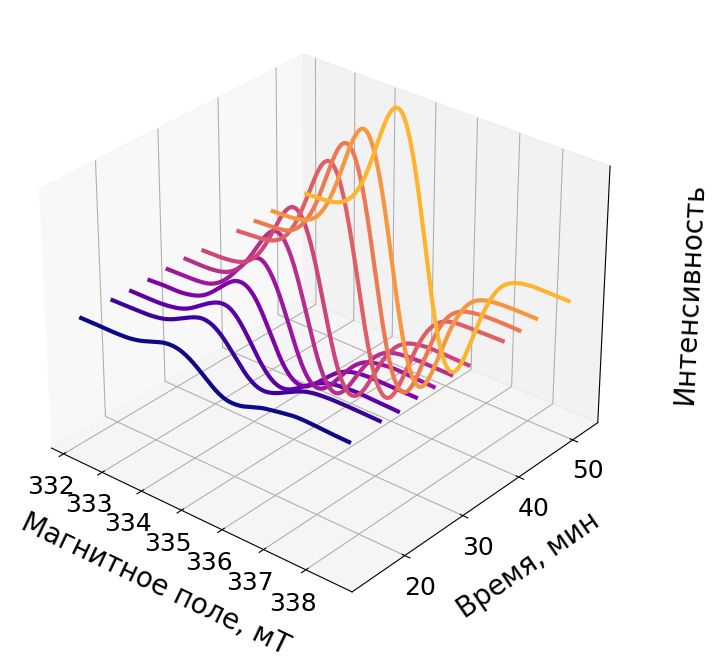

In [28]:
from matplotlib.collections import PolyCollection

fig = plt.figure(figsize=(10,8))
verts = []
ax = fig.add_subplot(projection='3d')


#for name in y_names:
ax.view_init(30, -50)
for i,name in enumerate(y_names[:-1:]):
    filtered = lowess(y_full[name], x, is_sorted=True, frac=0.125, it=2)
    ax.plot(filtered[:,0], [time[i]]*len(x),filtered[:,1],color=cm.plasma(i/12),label=name, linewidth=3)
    #ax.plot(x[6:-21],  [i]*len(x[6:-21]),y_full[name][6:-21],)
ax.set_xlabel('Магнитное поле, мT', fontsize=20,labelpad=15)
ax.set_ylabel('Время, мин',fontsize=20,labelpad=15)
ax.set_zlabel('Интенсивность',fontsize=20, labelpad=15);
ax.set_zticks([])

plt.savefig('colored_generation_3d.pdf', bbox_inches='tight')
plt.show()

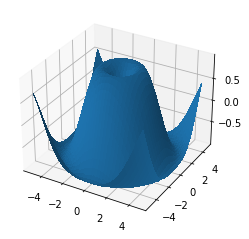

In [43]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z,
                       linewidth=0, antialiased=False)

In [98]:
Y.shape

(499, 499)

In [97]:
X.shape

(499, 499)

In [102]:
y_full[y_names[0]].shape

(500,)

In [115]:
al, ol = np.meshgrid(y_full[y_names[0]][1:], np.arange(1, len(X)+1))

In [116]:
al.shape


(499, 499)

In [96]:
Z.shape

(500,)

In [64]:
x=np.arange(1, len(X))

In [75]:
X.shape

(499,)

# RELAXATION

In [30]:
directory = "EXCEL/relaxation/excel"
directory = '/Users/smoluakov/Documents/DIPLOMA/EPR_DATA/10.03_CD154/EXEL/relaxation/'
list_of_files = sorted(os.listdir(directory))

data_2 = pd.read_excel(directory+'/'+'cd154_full.xlsx')

In [31]:
data_2

,X (500 points),Y (Average),Y (Average).1,Y (Average).2,Y (Average).3,Y (Average).4,Y (Average).5,196.2537841796875,Y (Average).6,Y (Average).7,Y (Average).8,Y (Average).9
0,332.152771,-85.461227,-96.631920,200.472656,-234.821854,54.003338,-71.338692,-51.345146,92.247223,-58.038525,102.396675,11.534932
1,332.165680,240.327682,-69.835709,-81.205101,264.897583,-77.467812,154.211853,-275.670471,-83.061668,102.591919,-137.486420,81.147568
2,332.178619,-138.774551,105.694221,-212.829590,-0.793866,15.088926,-21.429560,310.471313,-2.066295,-54.324421,-30.165051,1.007665
3,332.191528,-122.597115,-70.608086,302.385101,-95.474449,51.837044,-47.913364,-104.343048,-74.492752,-28.403196,10.459442,-45.189919
4,332.204468,88.482330,-106.118744,-46.936085,175.632004,-72.207153,-144.824295,-40.604595,120.696289,205.416367,-92.346916,198.206894
...,...,...,...,...,...,...,...,...,...,...,...,...
495,338.551422,-123.396576,83.136871,-137.088837,16.572691,-286.300232,-141.627335,-256.524872,-150.033249,-128.814636,-265.319397,-143.112335
496,338.564362,-71.380997,-171.739365,-144.360336,10.963771,94.526474,144.615067,-125.763954,-264.896545,43.439564,-20.649773,-161.837128
497,338.577301,-119.810043,4.396358,-71.136612,44.388000,-142.316544,-186.393631,77.169174,-10.115710,-217.012207,-192.991180,-111.420677
498,338.590210,-156.407776,-191.532257,2.296604,-6.320942,-182.880859,-215.833344,-76.342598,-84.253548,79.093048,-8.012228,-157.870575


<AxesSubplot:>

findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.


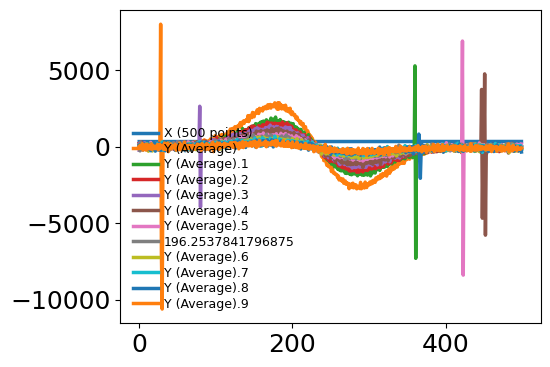

In [32]:
data_2.plot()

In [33]:
x_2 = data_2['X (500 points)']
y_full_2 = data_2.drop(['X (500 points)'], axis=1)
y_names_2 = list(y_full_2.columns)
time_2 = [1,8,11,14,17,20,23,26,29,34,37,40]

In [34]:

for name in y_names_2:
    for i in range(1,len(y_full_2[name])):
        if abs(diff(y_full_2[name])[i]) < 700:
            y_full_2[name][i] = y_full_2[name][i]
        else:
            y_full_2[name][i] = (np.mean(y_full_2[name][i-7:i-5]))

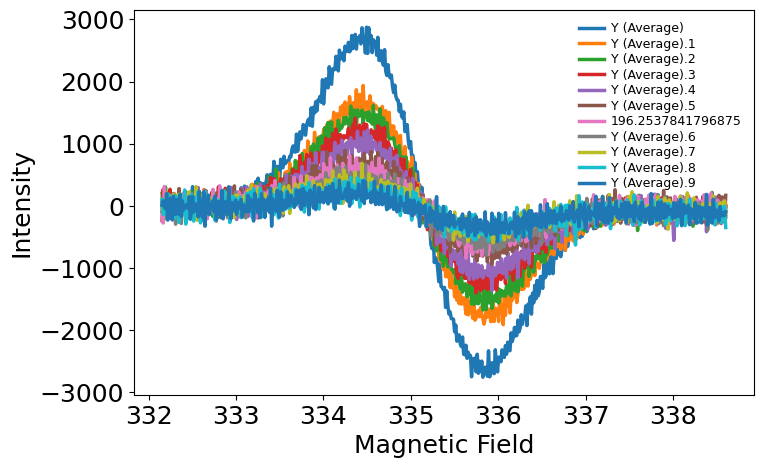

In [35]:
import seaborn as sns
plt.figure(figsize=(8,5))
plt.xlabel('Magnetic Field')
plt.ylabel('Intensity')
#plt.vlines(335.38, -7500,7500)
for name in y_names_2:
    plt.plot(x_2, y_full_2[name], label=name) # посчитал в экселе сколько между 335.17 и 335.38 точек
    plt.legend()
    

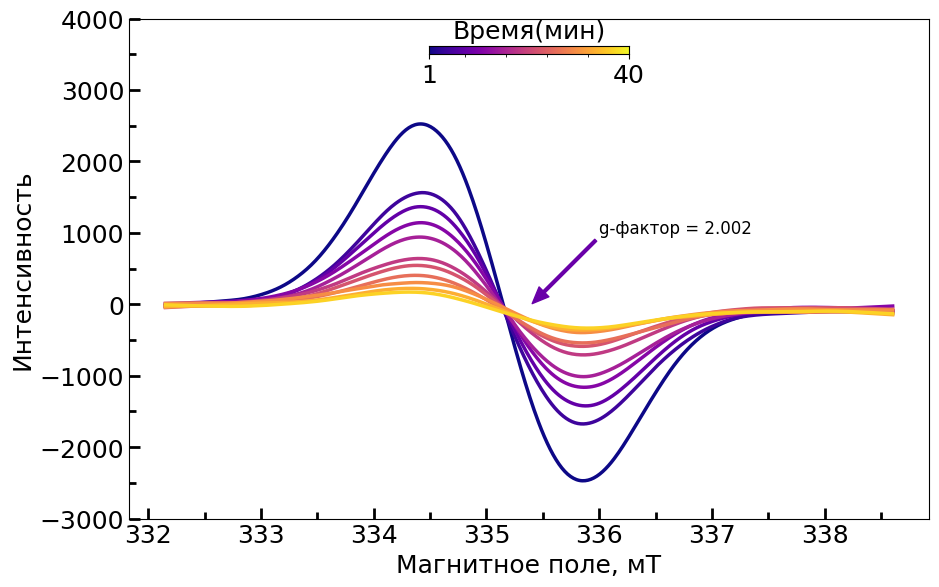

In [42]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns

fig = plt.figure(figsize=(8,5))
ax = plt.gca()
ax = fig.add_axes([0,0,1,1])

#plt.figure(figsize=(8,5))
plt.xlabel('Magnetic Field')
plt.ylabel('Intensity')
#plt.vlines(335.38, -7500,7500)
#plt.vlines(335.17, -4500,4500)

ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')


ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1000))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(500))

ax.set_xlabel('Магнитное поле, мТ')
ax.set_ylabel('Интенсивность')


for i,name in enumerate(y_names_2):
    filtered = lowess(y_full_2[name], x_2, is_sorted=True, frac=0.125, it=2)
    ax.plot(filtered[:,0], filtered[:,1],color=cm.plasma(i/11),label=time_2[i])
    #plt.plot(x, y_full[name], label=name) # посчитал в экселе сколько между 335.17 и 335.38 точек
    #ax.legend(title="Время(мин)",fontsize =10,title_fontsize=11,) #bbox_to_anchor=(0.785, 0.5))

    
ax.set_ylim([-3000, 4000])
ax.annotate('g-фактор = 2.002 ', xy=(335.4, 0), xytext=(336, 1000.7),
            arrowprops=dict(color=cm.plasma(50),width=2,headwidth=10, shrink=0.01), fontsize=12)

cmap = plt.cm.get_cmap('plasma')
colors = cmap(np.arange(cmap.N))   
cmap = grayscale_cmap(cmap)
grayscale = cmap(np.arange(cmap.N))    
#plt.savefig('relaxation.png', bbox_inches='tight')
newax = fig.add_axes([0.375, 0.745, 0.25, 0.2], anchor='NE')
newax.imshow([colors],origin='upper', extent=[1, 40, 0.5, 2],)    
newax.axes.get_yaxis().set_visible(False)
#newax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')
newax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(8))
newax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(8))
newax.set_xticks([1,40])
newax.set_title('Время(мин)')    
    
    
plt.savefig('colored_relaxation.pdf', bbox_inches='tight')
plt.show()

#plt.plot(x, y_full[y_names[10]], 'r')
#plt.plot(filtered[:,0], filtered[:,1], 'b')

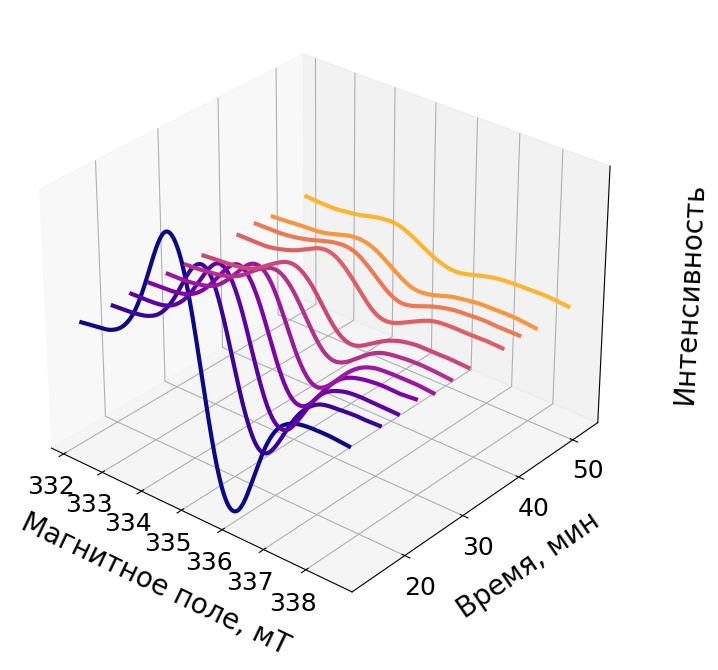

In [45]:
from matplotlib.collections import PolyCollection

fig = plt.figure(figsize=(10,8))
verts = []
ax = fig.add_subplot(projection='3d')


#for name in y_names:
ax.view_init(30, -50)
for i,name in enumerate(y_names_2):
    filtered = lowess(y_full_2[name], x_2, is_sorted=True, frac=0.125, it=2)
    ax.plot(filtered[:,0], [time[i]]*len(x_2),filtered[:,1],color=cm.plasma(i/12),label=name, linewidth=3)
    #ax.plot(x[6:-21],  [i]*len(x[6:-21]),y_full[name][6:-21],)
ax.set_xlabel('Магнитное поле, мT', fontsize=20,labelpad=15)
ax.set_ylabel('Время, мин',fontsize=20,labelpad=15)
ax.set_zlabel('Интенсивность',fontsize=20, labelpad=15);
ax.set_zticks([])
plt.savefig('colored_relaxation_3d.pdf', bbox_inches='tight')
plt.show()

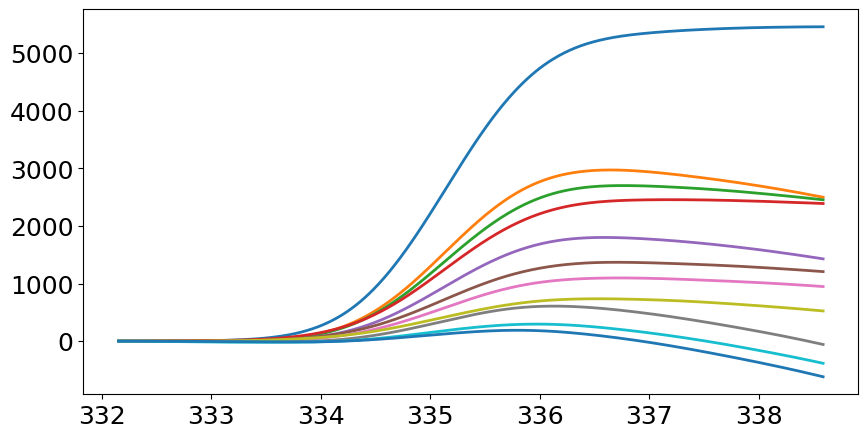

In [81]:
a_2 = []
fig = plt.figure(figsize=(10,5))
verts_2 = []
for i,name in enumerate(y_names_2):
    q_2 = []
    for j in range(1,len(x_2)):
        q_2.append(integrate.simps(y_full_2[name][:j], x_2[:j], dx=x_2[:j], even='first'))
    q_3 = []
    for k in range(1,len(x_2)):   
        q_3.append(integrate.simps(q_2[:k], x_2[:k], dx=x_2[:k], even='first'))
    a_2.append(max(q_3))
    plt.plot(x_2[:499],q_3,linewidth=2)

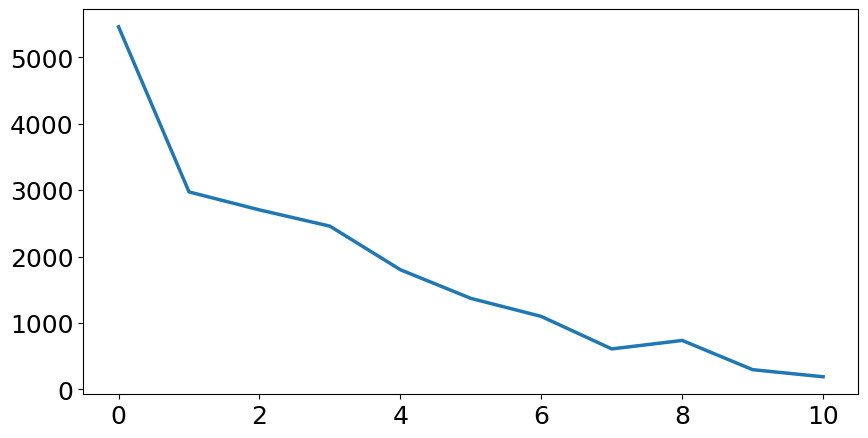

In [82]:
fig = plt.figure(figsize=(10,5))
plt.plot(range(len(a_2)), a_2)

In [102]:
len(time[:11])

11

In [107]:
time

[14, 19, 22, 25, 28, 31, 34, 40, 43, 46, 52, 55, 75]

In [99]:
len(a_2)

11

In [238]:
from scipy.optimize import curve_fit

In [226]:
db = np.array([5399.264648,3430.36377, 2920.988037, 2489.212646, 2138.98999,1518.643799, 1354.611084, 935.6325073, 904.9724731, 546.6608887, 612.742981])
tm = np.array([1,8,11,14,17,23,26,29,34,37,40])

In [261]:
popt, pcov = [], []

def exponenial_func_1(x, a, b, c):
    y = a*np.exp(x/(-b))+c 
    return y

popt, pcov = curve_fit(exponenial_func_1, tm, db, p0=(5500, 16, 100))

In [262]:
popt

array([5585.03032603,   16.38525333,  102.09508384])

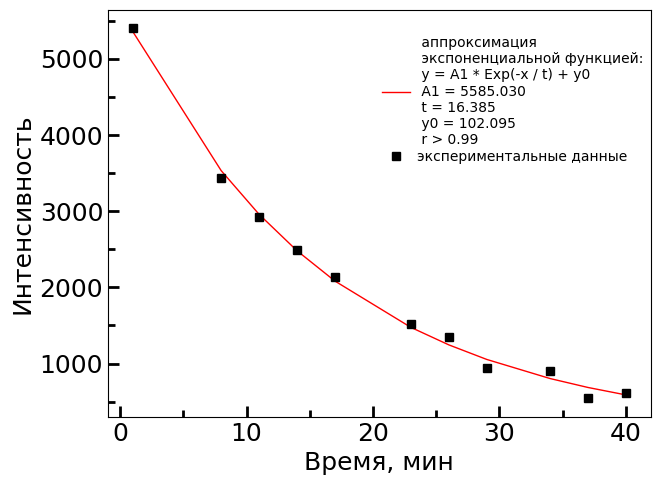

In [289]:
#ax.plot(tm, exponenial_func_1(tm, *popt),linewidth= 1, color='red',)

        #label=' Fitted Function:\n y = A1 * Exp(-x / t) + y0 \n A1 = %5.3f\n t = %5.3f\n y0 = %5.3f\n r = 0.999' % tuple(popt))    
#ax.plot(tm, db,'s',markersize=6,markerfacecolor='black',markeredgecolor='black',label='experiment')


def exponenial_func_1(x, a, b, c):
    return a*np.exp(x/(-b))+c

popt, pcov = curve_fit(exponenial_func_1, tm, db, p0=(5500, 16, 100))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1000))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(500))

ax.set_xlabel('Время, мин')
ax.set_ylabel('Интенсивность')

ax.plot(tm, exponenial_func_1(tm, *popt),linewidth= 1, color='red',
        label=' аппроксимация\n экспоненциальной функцией:\n y = A1 * Exp(-x / t) + y0 \n A1 = %5.3f\n t = %5.3f\n y0 = %5.3f\n r > 0.99' % tuple(popt))    
ax.plot(tm, db,'s',markersize=6,markerfacecolor='black',markeredgecolor='black',label='экспериментальные данные')
#ax.text(10,0.25,'(b)',fontsize=25)
#ax.set_title('Кинетика изменения оптической плотности в полосе поглощения дикатион-радикала в процессе анодной поляризации', pad=14, fontsize=20 )
ax.legend(bbox_to_anchor=(0.48, 0.97),fontsize=10)
plt.savefig('EXP_FITT_ERP_REL.png', transparent=False, bbox_inches='tight') 
plt.show()

In [278]:
my_rho = np.corrcoef(db, exponenial_func_1(tm, *popt))

In [280]:
my_rho

array([[1.        , 0.99827899],
       [0.99827899, 1.        ]])